In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from functools import partial

In [3]:
%load_ext autoreload
%autoreload 2
from peak_counting import utils
from peak_counting import strats
from peak_counting import constants
from peak_counting import analysis

In [3]:

df = pd.read_pickle(constants.PEAKS_PATH)
df

,time,ch1
0,0.000000e+00,3.422852
1,1.600000e-08,3.420410
2,3.200000e-08,3.430176
3,4.800000e-08,3.437500
4,6.400000e-08,3.430176
...,...,...
16245,2.599200e-04,3.417969
16246,2.599360e-04,3.430176
16247,2.599520e-04,3.432617
16248,2.599680e-04,3.417969


In [77]:
plt.close('all')
plt.plot(df.time, df.ch1)
plt.show()

In [5]:
%matplotlib tk

In [16]:
strategies = {
    "original":strats.original,
    "negative_original":partial(strats.negative_original, threshold=1.5),
    "fpcwt":partial(strats.fpcwt, min_snr=100),
}
plt.close('all')
plt.plot(df.time, df.ch1, '.-')
for name, s in strategies.items():
    peaks = s(df)
    plt.plot(peaks.time, peaks.ch1, 'o', alpha=0.7, label=name)
plt.legend()
plt.show()

In [67]:
min_wl, max_wl = (530, 561)
rng = (min_wl, max_wl)
strat_fpcwt = partial(strats.fpcwt, min_snr=1.5)
#strat_fpcwt = partial(strats.original)#, rng=rng)#, min_snr=100)
#wls, spectrum = utils.calc_spectrum(constants.PATH_038, strat_fpcwt, rng=380)

In [18]:
plt.close('all')
plt.plot(wls, spectrum)
plt.show()

In [20]:
differences = utils.calc_distances(constants.PATH_038, strategies["negative_original"], rng=380)

In [73]:
path = "/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/data"
np.save(f"{path}/differences_sampl_0.38_542nm_fpcwt_snr1.5.npy", differences * constants.SR)

In [70]:
diff_samples = differences*constants.SR
print(differences)
#diff_samples[diff_samples > 10]
#print(np.mean(diff_samples))
#print(np.mean(diff_samples[diff_samples > 10]))

[3.52e-07 4.16e-07 3.52e-07 ... 4.48e-07 2.88e-07 3.36e-07]


In [21]:
#bins = np.linspace(1e-7, 2e-5, 100)
bins = np.arange(1, 5000, 10)
bin_edges, freq = np.histogram(differences * constants.SR, density=True, bins=bins)
bin_width = bin_edges[1] - bin_edges[0]
#bin_edges_samples = bin_edges * constants.SR
#bin_centres = bin_edges[1:-1] + bin_width/2

In [22]:
plt.close('all')
plt.stairs(bin_edges, freq)
plt.show()

In [75]:
df_original = strats.original(df)

In [76]:
df_original

,time,ch1
636,0.000010,0.734863
638,0.000010,1.596680
645,0.000010,2.834473
687,0.000011,0.749512
689,0.000011,1.550293
...,...,...
16015,0.000256,1.120605
16017,0.000256,2.355957
16171,0.000259,0.256348
16172,0.000259,1.164551


In [31]:
neg_orig = partial(strats.negative_original, threshold=1.5)
analysis.plot_spectrum(constants.PATH_022, neg_orig)
analysis.plot_spectrum(constants.PATH_038, neg_orig)
plt.show()

An exception ocurred: pickle data was truncated
An exception ocurred: [Errno 21] Is a directory: '/home/tomi/Documents/academicos/facultad/tesis/tesis/data/nanoscale-paper/0.2228_0.1000/391/391'
An exception ocurred: [Errno 21] Is a directory: '/home/tomi/Documents/academicos/facultad/tesis/tesis/data/nanoscale-paper/0.2228_0.1000/397/397'


# Analisis de picos - diferencia entre decimation 2 (62.5 MHz) y decimation 3 (31.25 MHz)

In [3]:
path = Path('/run/media/tomi/FOTOS 1 HDD 1GB/data/links')
path_038 = path/"0.3800_0.1000"
path_038_dec3 = path/"dec_3_0.3800_0.1000"

370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
An exception ocurred: Ran out of input
An exception ocurred: [Errno 21] Is a directory: '/run/media/tomi/FOTOS 1 HDD 1GB/data/links/dec_3_0.3800_0.1000/422/422'
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579

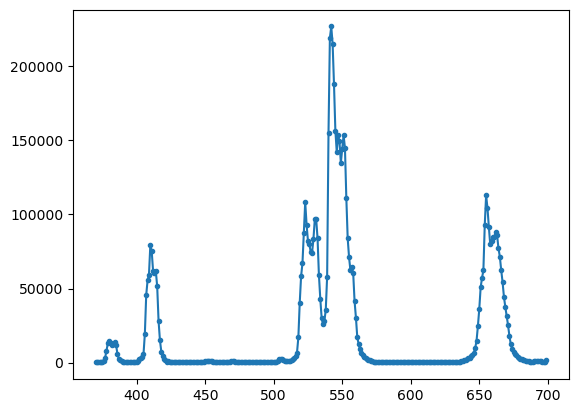

In [9]:
#wls038, spec038 = utils.calc_spectrum(path_038, strats.negative_original, verbose=True)
#plt.plot(wls038, spec038, '-.')
wls038_dec3, spec038_dec3 = utils.calc_spectrum(path_038_dec3, strats.negative_original, verbose=True)
plt.plot(wls038_dec3, spec038_dec3, '.-')

In [11]:
df_spec038_dec3 = pd.DataFrame(dict(wavelength=wls038_dec3, counts=spec038_dec3))
df_spec038_dec3

,wavelength,counts
0,370,132.0
1,371,128.0
2,372,164.0
3,373,160.0
4,374,259.0
...,...,...
325,695,849.0
326,696,671.0
327,697,512.0
328,698,723.0


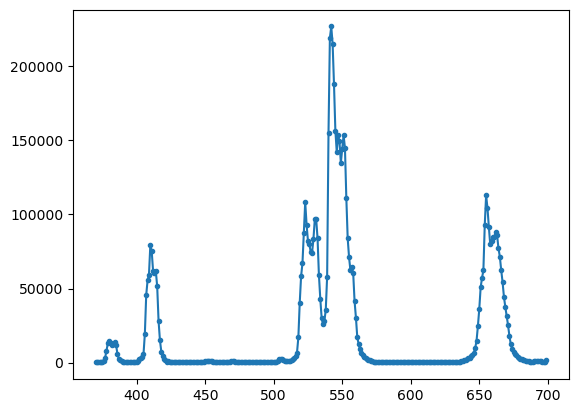

In [12]:
df_spec038_dec3.to_pickle('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/spectrums/spec038_dec3.pickle')
plt.plot(df_spec038_dec3.wavelength, df_spec038_dec3.counts, '.-')
plt.show()

In [ ]:
%matplotlib tk

In [24]:
plt.title("Espectros decimacion 2 y 3")
plt.plot(df_spec038.wavelength, df_spec038.counts, '.-', label="dec 2")
plt.plot(df_spec038_dec3.wavelength - 1, df_spec038_dec3.counts, '.-', label="dec 3")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts per sec (1/s)")
plt.legend()
plt.show()

In [25]:

plt.title("Espectros decimacion 2 y 3 normalizado al maximo")
plt.plot(df_spec038.wavelength, df_spec038.counts/np.max(df_spec038.counts), '.-', label="dec 2")
plt.plot(df_spec038_dec3.wavelength - 1, df_spec038_dec3.counts/np.max(df_spec038_dec3.counts), '.-', label="dec 3")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts per sec (1/s)")
plt.legend()
plt.show()

In [26]:
plt.title("Espectros decimacion 2 y 3 normalizado al area")
plt.plot(df_spec038.wavelength, df_spec038.counts/np.sum(df_spec038.counts), '.-', label="dec 2")
plt.plot(df_spec038_dec3.wavelength - 1, df_spec038_dec3.counts/np.sum(df_spec038_dec3.counts), '.-', label="dec 3")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts per sec (1/s)")
plt.legend()
plt.show()

In [88]:

base_data_path = Path('/run/media/tomi/FOTOS 1 HDD 1GB/data/links')
#base_data_path = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/data/nanoscale-paper')
spectrums_path = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/spectrums')
counts_base_path = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/data/counts_spectrum')
dirs = ("0.2479_0.1000", "0.2759_0.1000", "0.3069_0.1000", "0.3415_0.1000")

try:
    for d in dirs:
        p = base_data_path/d
        counts_path = counts_base_path/f"{d}.txt"
        f = open(counts_path, "w")
        wls, spec = utils.calc_spectrum(p, strats.negative_original, verbose=True, counts_path=f)
        f.close()
        df = pd.DataFrame(dict(wavelength=wls, counts=spec))
        df.to_pickle(spectrums_path/f"{d}.pickle")
        plt.plot(df.wavelength, df.counts, '.-')
finally:
    f.close()

plt.show()

370
371
372
373
374
375
376
An exception ocurred: [Errno 21] Is a directory: '/run/media/tomi/FOTOS 1 HDD 1GB/data/links/0.2479_0.1000/376/376'
An exception ocurred: Ran out of input
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
5

In [28]:
df

,wavelength,counts
0,370,76.0
1,371,69.0
2,372,68.0
3,373,55.0
4,374,75.0
...,...,...
325,695,195.0
326,696,166.0
327,697,142.0
328,698,187.0


In [30]:
#df.to_pickle(base_data_path/"0.2003_0.1000.pickle")

In [35]:
f"{p}.pickle"

'/run/media/tomi/FOTOS 1 HDD 1GB/data/links/0.2228_0.1000.pickle'

In [39]:
missing = [
{'wavelength': 370, 'counts': 391, 'integration_time': 0.00052},
{'wavelength': 371, 'counts': 313, 'integration_time': 0.00052},
{'wavelength': 372, 'counts': 406, 'integration_time': 0.00052},
{'wavelength': 373, 'counts': 451, 'integration_time': 0.00052},
{'wavelength': 374, 'counts': 528, 'integration_time': 0.00052},
{'wavelength': 375, 'counts': 784, 'integration_time': 0.00052},
{'wavelength': 376, 'counts': 2540, 'integration_time': 0.00052},
{'wavelength': 377, 'counts': 5609, 'integration_time': 0.00052},
{'wavelength': 378, 'counts': 9575, 'integration_time': 0.00052},
{'wavelength': 379, 'counts': 11166, 'integration_time': 0.00052},
{'wavelength': 380, 'counts': 9626, 'integration_time': 0.00052},
{'wavelength': 381, 'counts': 8879, 'integration_time': 0.00052},
{'wavelength': 382, 'counts': 9639, 'integration_time': 0.00052},
{'wavelength': 383, 'counts': 10478, 'integration_time': 0.00052},
{'wavelength': 384, 'counts': 8746, 'integration_time': 0.00052},
{'wavelength': 385, 'counts': 4953, 'integration_time': 0.00052},
{'wavelength': 386, 'counts': 2539, 'integration_time': 0.00052},
{'wavelength': 387, 'counts': 1269, 'integration_time': 0.00052},
{'wavelength': 388, 'counts': 908, 'integration_time': 0.00052},
{'wavelength': 389, 'counts': 653, 'integration_time': 0.00052},
{'wavelength': 390, 'counts': 496, 'integration_time': 0.00052},
{'wavelength': 391, 'counts': 398, 'integration_time': 0.00052},
{'wavelength': 392, 'counts': 366, 'integration_time': 0.00052},
{'wavelength': 393, 'counts': 323, 'integration_time': 0.00052},
{'wavelength': 394, 'counts': 302, 'integration_time': 0.00052},
{'wavelength': 395, 'counts': 294, 'integration_time': 0.00052},
{'wavelength': 396, 'counts': 320, 'integration_time': 0.00052},
{'wavelength': 397, 'counts': 304, 'integration_time': 0.00052},
{'wavelength': 398, 'counts': 358, 'integration_time': 0.00052},
{'wavelength': 399, 'counts': 563, 'integration_time': 0.00052},
{'wavelength': 400, 'counts': 879, 'integration_time': 0.00052},
{'wavelength': 401, 'counts': 1583, 'integration_time': 0.00052},
{'wavelength': 402, 'counts': 1944, 'integration_time': 0.00052},
{'wavelength': 403, 'counts': 2320, 'integration_time': 0.00052},
{'wavelength': 404, 'counts': 3922, 'integration_time': 0.00052},
{'wavelength': 405, 'counts': 15151, 'integration_time': 0.00052},
{'wavelength': 406, 'counts': 34623, 'integration_time': 0.00052},
{'wavelength': 407, 'counts': 46922, 'integration_time': 0.00052},
{'wavelength': 408, 'counts': 51854, 'integration_time': 0.00052}]
df2 = pd.read_pickle('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/spectrums/409_700_1_0.5_0.180.pickle')
current = df2.to_dict('records')
df3 = pd.DataFrame(missing+current)
df3

,wavelength,counts,integration_time
0,370,391,0.00052
1,371,313,0.00052
2,372,406,0.00052
3,373,451,0.00052
4,374,528,0.00052
...,...,...,...
325,695,643,0.00052
326,696,472,0.00052
327,697,653,0.00052
328,698,1315,0.00052


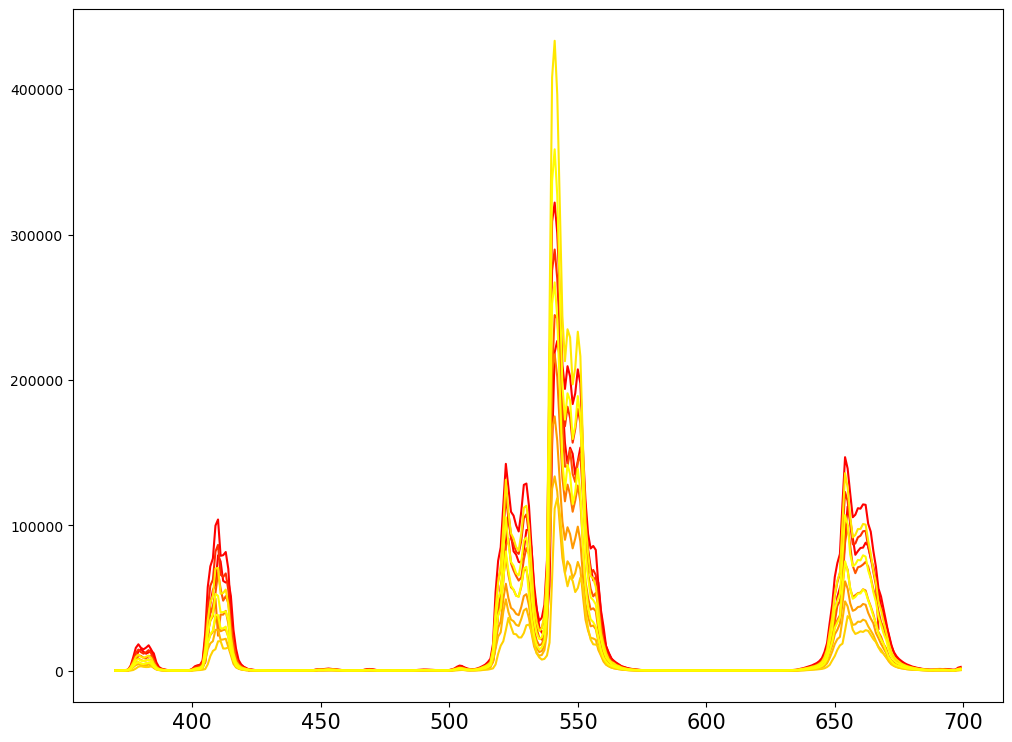

In [9]:
%matplotlib inline
from functools import partial
from matplotlib import colormaps
from matplotlib.colors import Normalize, rgb2hex

def process_spectrums():
    path = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/spectrums')
    for p in sorted(path.iterdir()):
        lst = p.name.split("_")
        curr = float(lst[0])
        if curr < 0.23 or curr > 0.35:
            continue
        print(f"reading {p.name}")
        df = pd.read_pickle(p)
        df.counts = df.counts * 10
        df.to_pickle(f'/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/spectrums_processed/{p.name}')
        if curr == 0.3069:
            df.wavelength = df.wavelength - 0.5
        plt.plot(df.wavelength, df.counts, '.-', label=curr)
    plt.legend()
    plt.show()

def load_spectrums(feed_df, spectrums_dir, feed_end=None):
    path = Path(f'/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/{spectrums_dir}')
    for p in sorted(path.iterdir())[::-1]:
        lst = p.name.split("_")
        curr = lst[0]
        df = pd.read_pickle(p)
        feed_df(df, curr)
    if feed_end is not None:
        feed_end()

def plot_spectrums(df, curr, normalization: callable = None):
    norm = Normalize(vmin=0.16, vmax=0.381)
    cmap = colormaps['autumn'].reversed()
    if normalization is not None:
        df = normalization(df)
    color = cmap(norm(float(curr)))
    plt.plot(df.wavelength, df.counts, '-', label=f"current {float(curr):.2f} A", color=color, linewidth=1.5)

def norm_by_max(df):
    df.counts = df.counts / np.max(df.counts)
    return df

def norm_by_area(df):
    df.counts = df.counts / np.sum(df.counts)
    return df

plot_max = partial(plot_spectrums, normalization=norm_by_max)
plot_area = partial(plot_spectrums, normalization=norm_by_area)
plt.figure(figsize=(12, 9), dpi=100)
load_spectrums(plot_spectrums, 'spectrums')
#plt.ylabel("Cuentas por segundo (1/s)", fontsize=15)
#plt.xlabel("Longitud de onda (nm)", fontsize=15)
#plt.xticks([535, 570], fontsize=35)
plt.xticks(fontsize=15)
#plt.yticks([])
#plt.legend(fontsize=15)
#plt.axvline(535, ymin=0, linewidth=2, color="black", linestyle="dashed")
#plt.axvline(570, ymin=0, linewidth=2, color="black", linestyle="dashed")
plt.show()
#plt.show()
#plot_spectrums(norm_by_max)
#plt.show()
#plot_spectrums(norm_by_area)
#plt.xlabel("Wavelength (nm)")
#plt.ylabel("Counts per sec (1/s)")
#plt.legend()
#plt.show()

Empty DataFrame
Columns: [Y]
Index: []
col='Y', m=2.1321, c=19.4793
col='Y', m=4.1435, c=24.2328


/tmp/ipykernel_6133/572476477.py:70: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.loglog(ihp, corrhp, 'o', color=colors[col], markersize=10)


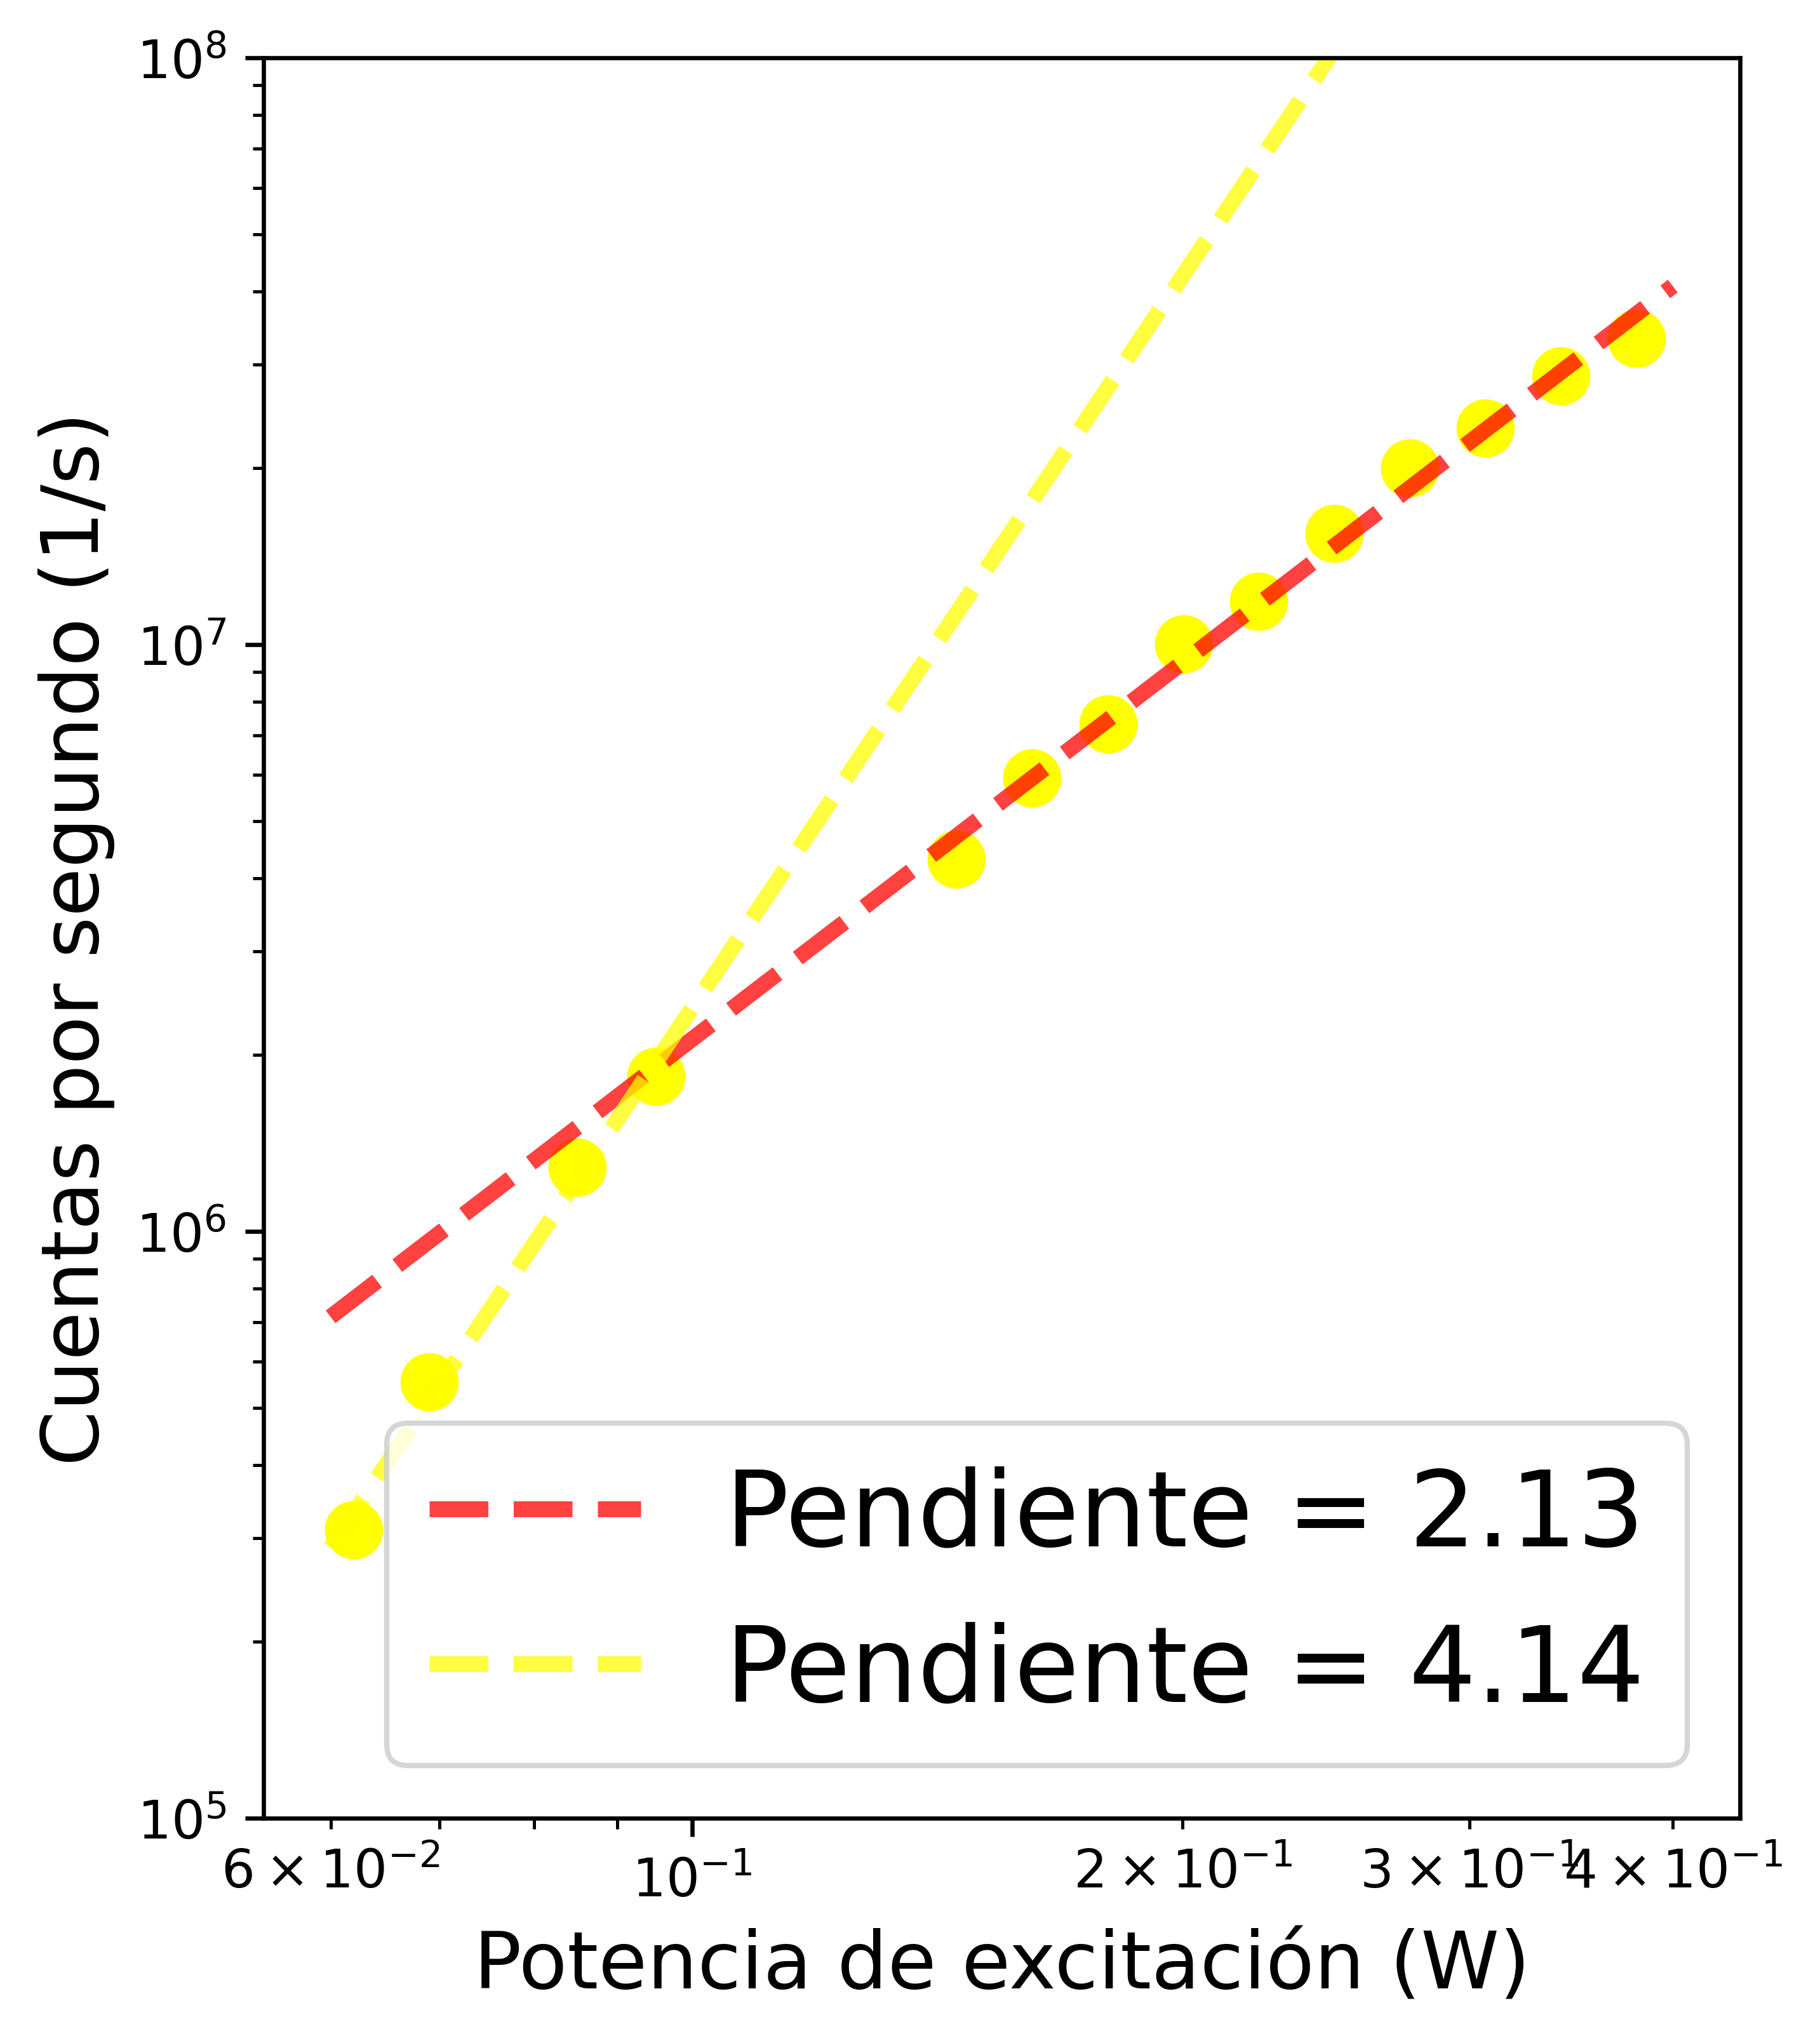

In [12]:
peak_wls = [379, 383, 410, 413, 469, 453, 504, 522, 530, 541, 546, 550, 557, 654, 662]
ranges = {
    #"G":(500, 535),
    #"R":(630, 690),
    "Y":(535,570),
    #"UVA":(372,390),
    #"B":(397, 525),
    #"O":(555, 563),
    #"V1":(375, 381),
    #"V2":(381, 390),
}
colors = {
    "G":"green",
    "R":"red",
    "Y":"yellow",
    "UVA":"purple",
    "B":"blue",
    "O":"orange",
    "V1":"violet",
    "V2":"lightblue"
}

wl_color ={
    379:"UVA",
    410:"B",
    522:"G",
    530:"G",
    541:"Y",
    546:"Y",
    550:"Y",
    654:"R",
    662:"R",
}

def integrate(df, rng):
    return np.sum(df.counts[df.wavelength.between(rng[0], rng[1])])

def load_feed(df, curr, intensities):
    for name, rng in ranges.items(): 
        intensities.loc[float(curr), name] = integrate(df, rng)
        
def plot_i_vs_ex():
    #fig, ax = plt.subplots(figsize=(10, 5))
    #currs = np.array([float(d) for d in dirs])
    intensities = pd.DataFrame(dict.fromkeys(ranges.keys()), index=pd.Index([], dtype=float, name='current'))
    print(intensities)
    load_spectrums(partial(load_feed, intensities=intensities), 'spectrums_yellow')
    intensities.sort_index(ascending=True, inplace=True)
    for col in intensities.columns: 

        #full_label = f"{col}, {ranges[col]} nm - pow = {mhp:.2f}"
        #label  = f"pow = {mhp:.2f}"
        i = intensities.index
        corr = intensities[col]
        #print(i.values, corr.values)
        corr = corr * 0.83333333 - 0.033333

        #plt.loglog(i.values, corr.values, 'o', color=colors[col], markersize=10, label=f"{col}, {ranges[col]}nm")

        ihp = i[4:]
        corrhp = corr.iloc[4:]

        logchp = np.log(ihp)
        logihp = np.log(corrhp.astype(np.int64))

        Ahp = np.vstack([logchp, np.ones_like(logchp)]).T
        mhp, chp = np.linalg.lstsq(Ahp, logihp)[0]
        print(f"{col=}, m={mhp:.4f}, c={chp:.4f}")
        plt.plot(logchp, logihp, 'o', color=colors[col], markersize=10)
        plt.loglog(ihp, corrhp, 'o', color=colors[col], markersize=10)


        ilp = intensities.index[:4]
        corrlp = intensities[col].iloc[:4]

        logclp = np.log(ilp)
        logilp = np.log(corrlp.astype(np.int64))

        Alp = np.vstack([logclp, np.ones_like(logclp)]).T
        mlp, clp = np.linalg.lstsq(Alp, logilp)[0]
        print(f"{col=}, m={mlp:.4f}, c={clp:.4f}")
        plt.plot(logclp, logilp, 'o', color=colors[col], markersize=10)
        plt.loglog(ilp, corrlp, 'o', color=colors[col], markersize=10)

        x = np.linspace(min(logclp), max(logchp), 100)
        x = np.linspace(6e-2, 4e-1, 100)
        y_hp = np.exp(chp) * x**mhp  # Reversing the log to linear
        y_lp = np.exp(clp) * x**mlp

        plt.loglog(x, y_hp, linestyle="dashed", color="#FF0100", alpha=0.75, linewidth=3, label=f"Pendiente = {mhp:.2f}")
        plt.loglog(x, y_lp, linestyle="dashed", color="#FFFD00", alpha=0.75, linewidth=3, label=f"Pendiente = {mlp:.2f}")

    #plt.yscale('log')
    #plt.xscale('log')
    #plt.xlim([-1.9, -0.42])
    plt.ylim([1e5, 1e8])
    plt.xlabel("Potencia de excitación (W)", fontsize=15)
    plt.ylabel("Cuentas por segundo (1/s)", fontsize=15)
    #plt.xticks(np.logspace())
    #plt.yticks([])
    plt.legend(fontsize=20, loc='lower right')
    plt.show() 

plt.figure(figsize=(5, 6), dpi=600)

plot_i_vs_ex()

In [120]:
pd.DataFrame(dict(G=[1], R=[1], Y=[1], UVA=[1], B=[1]), index=pd.Index([0.39],dtype=float, name='current'))

,G,R,Y,UVA,B
current,,,,,
0.39,1,1,1,1,1


491


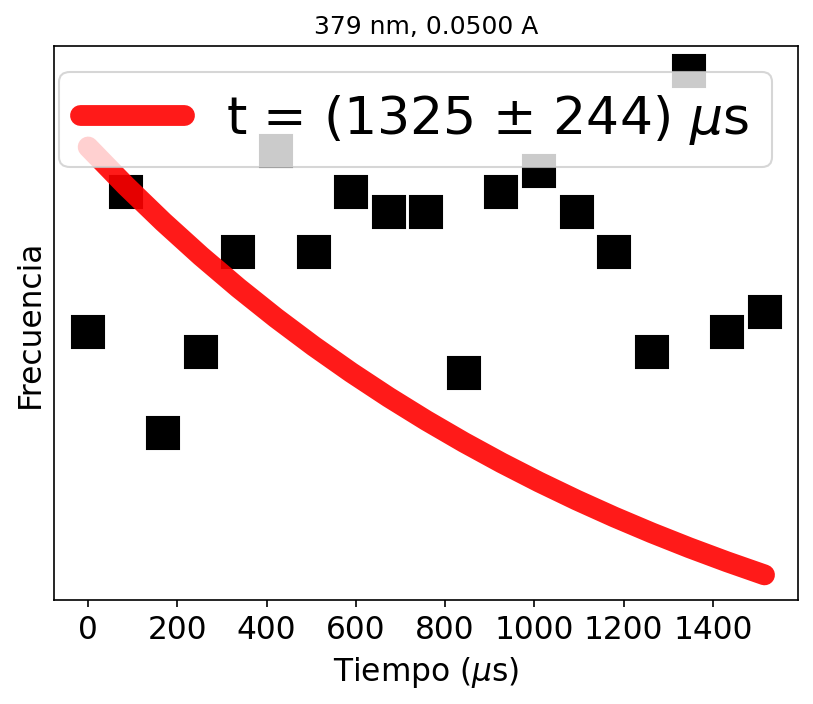

2955


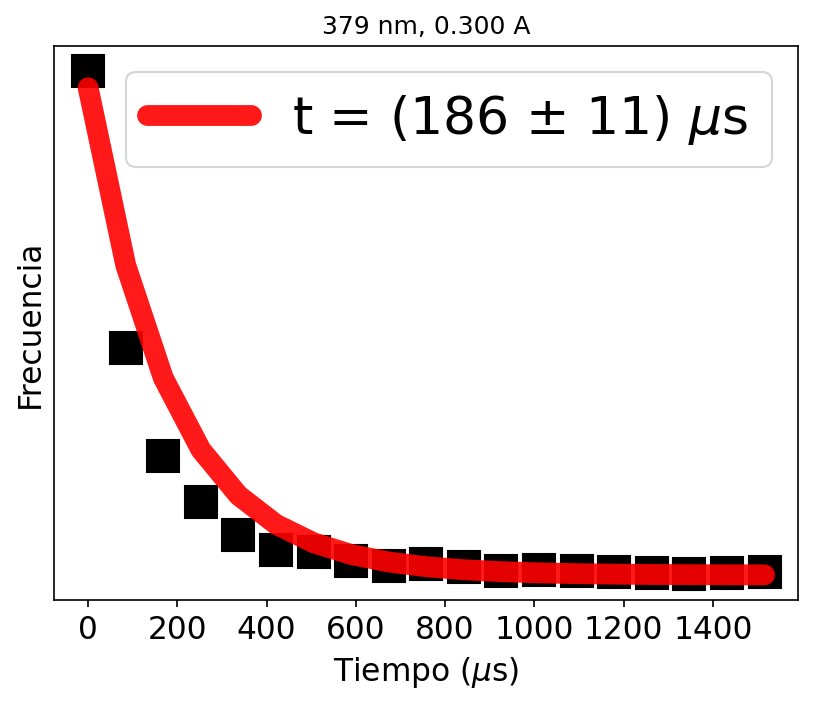

566


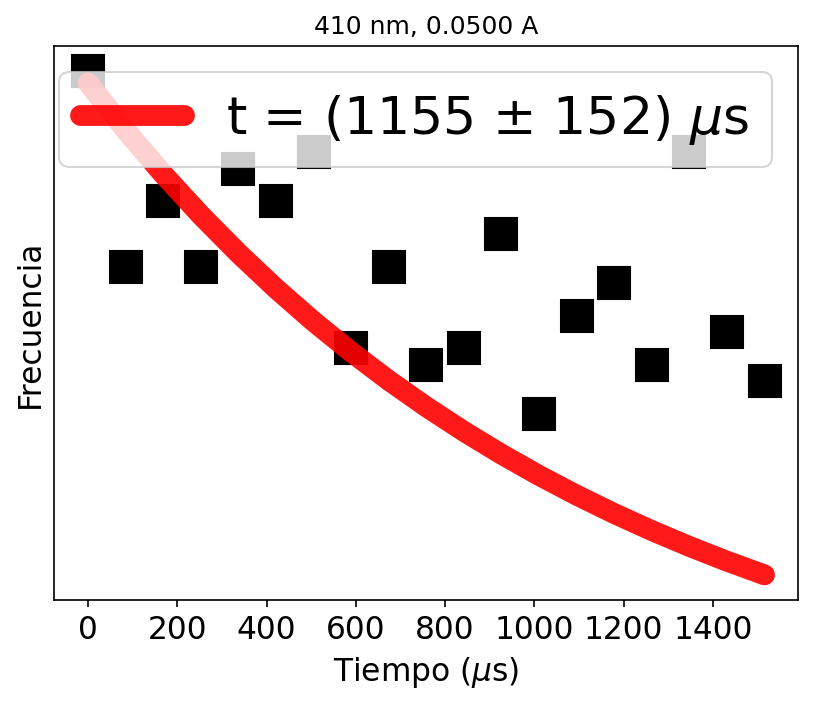

24388


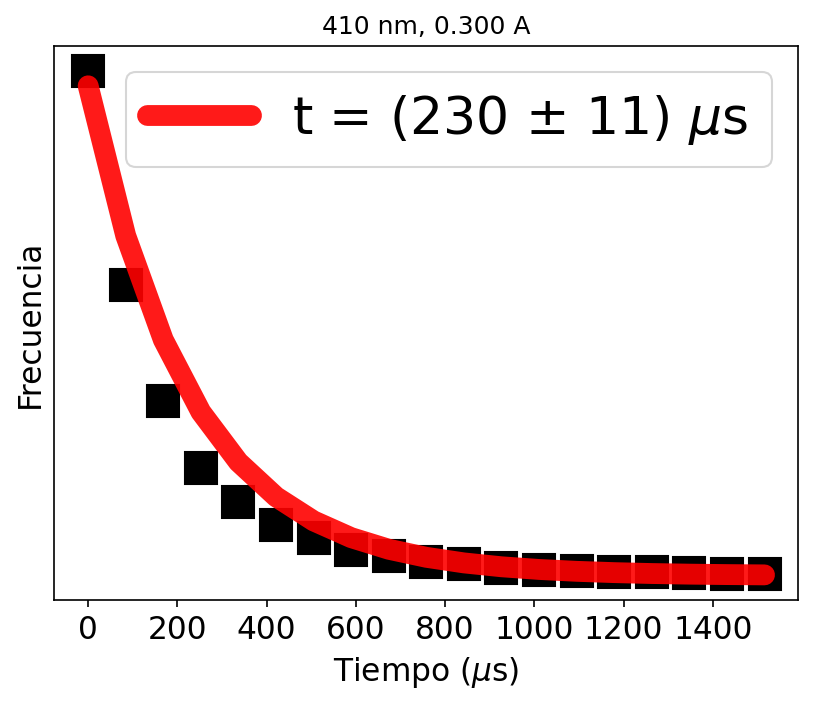

1063


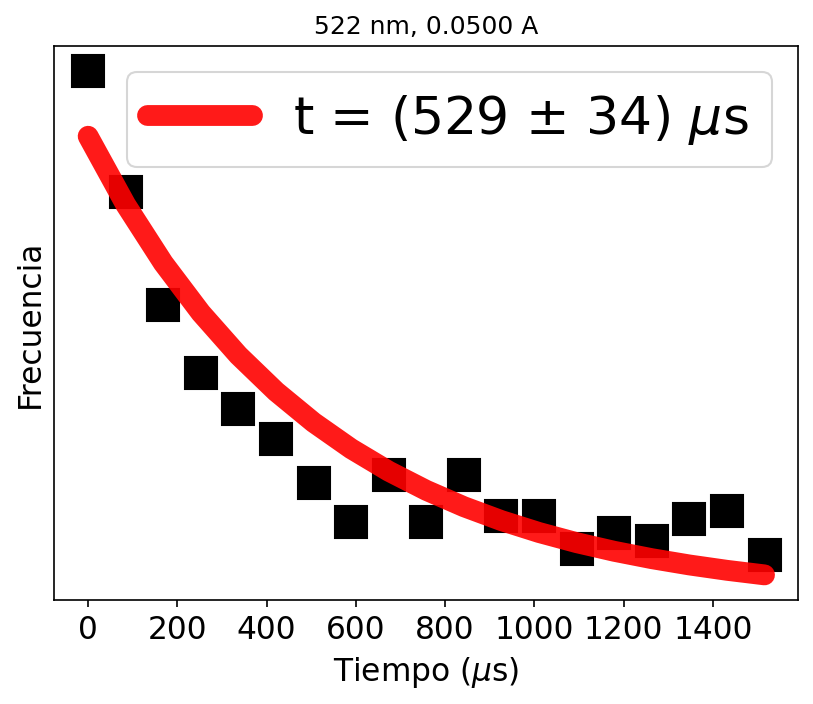

45630


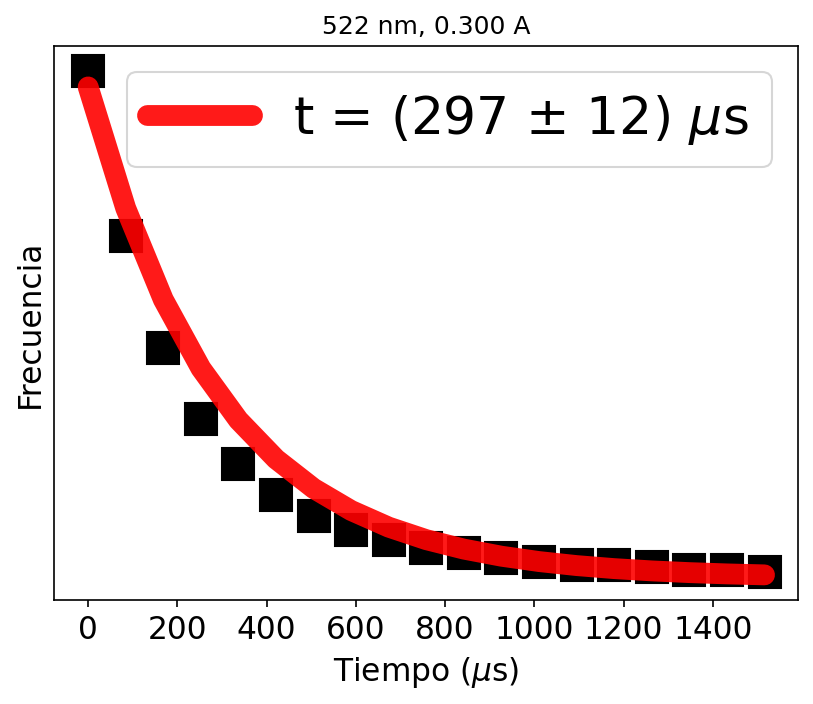

1051


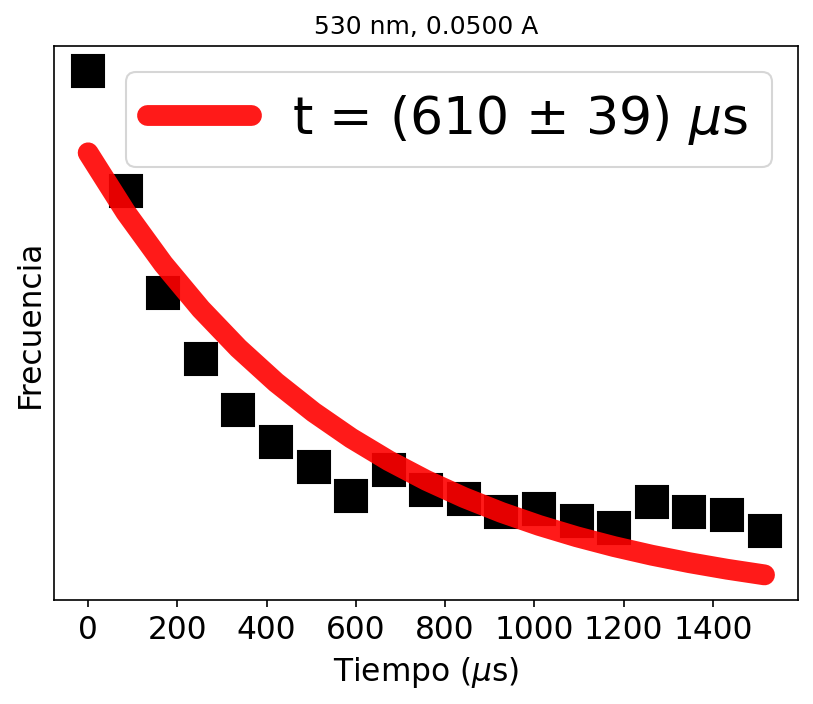

39507


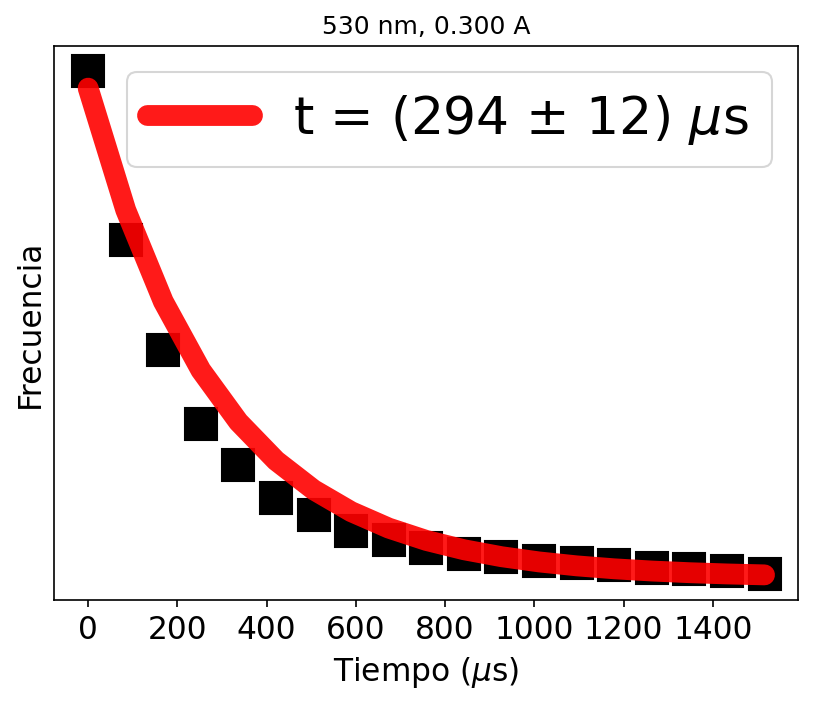

2698


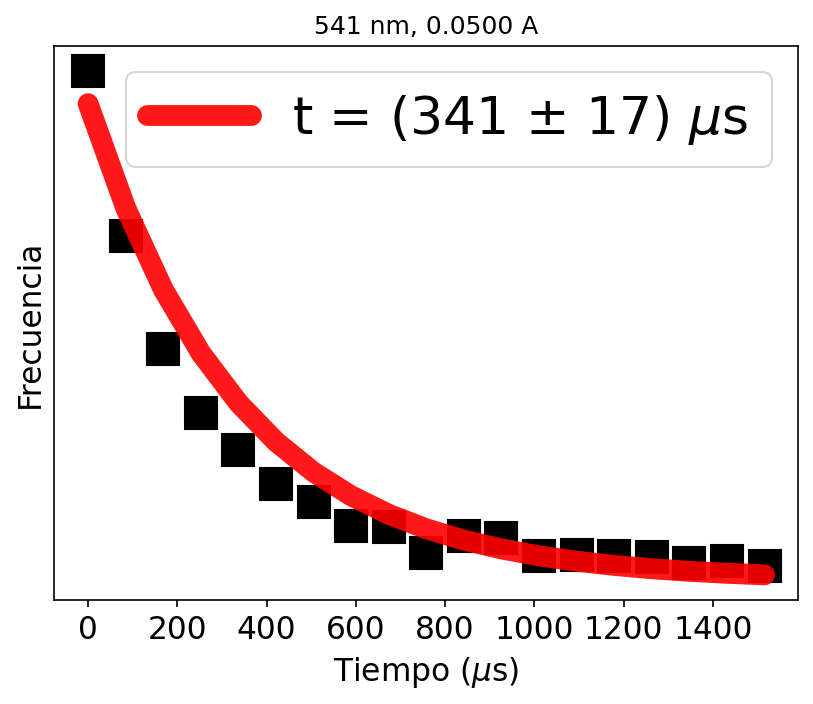

142231


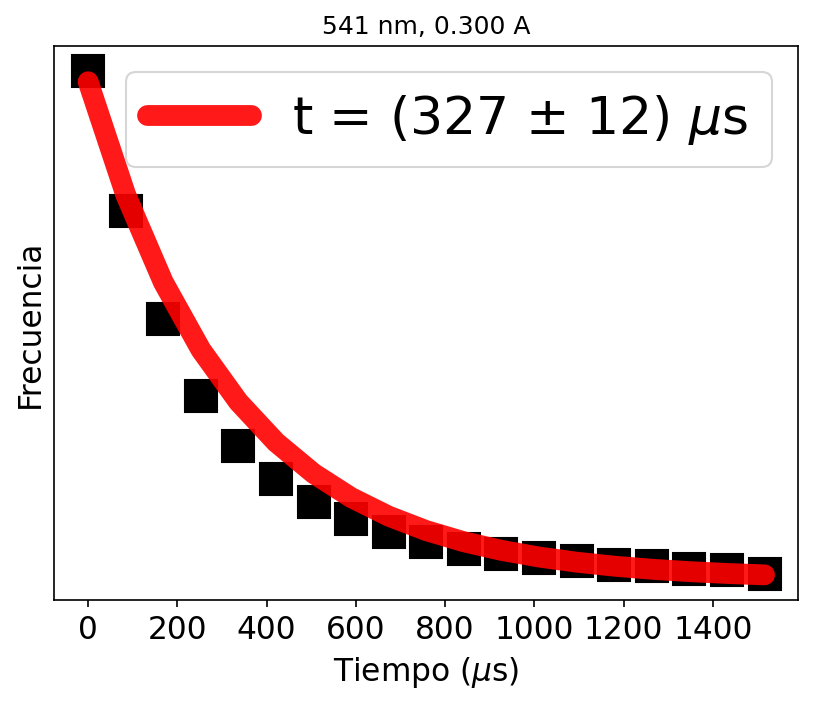

79571


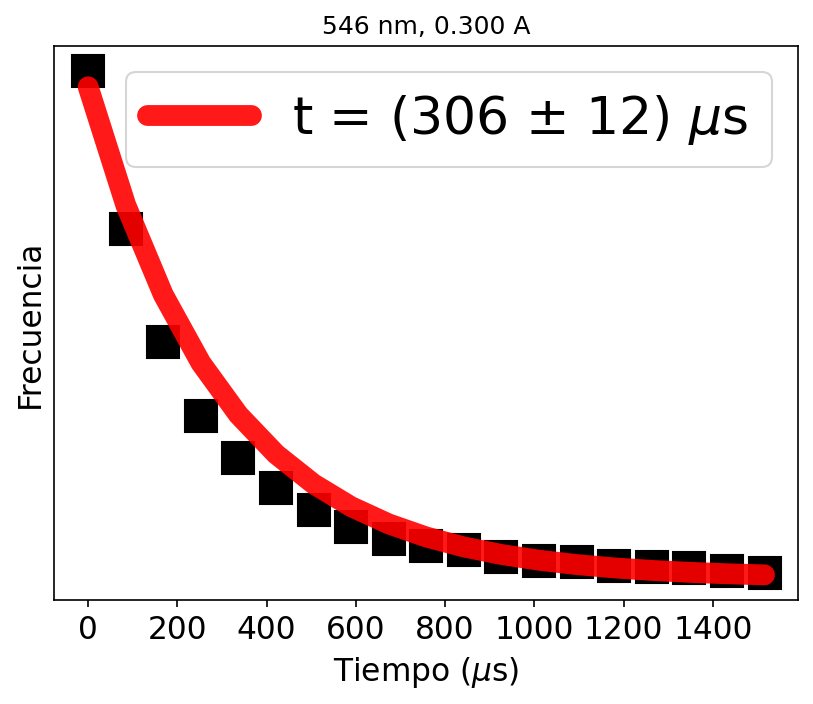

78158


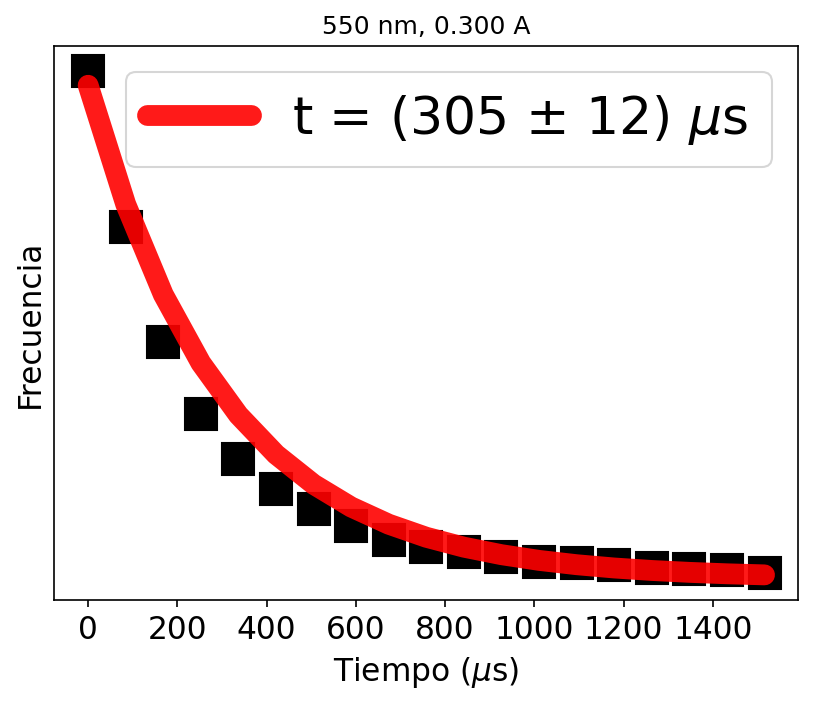

91247


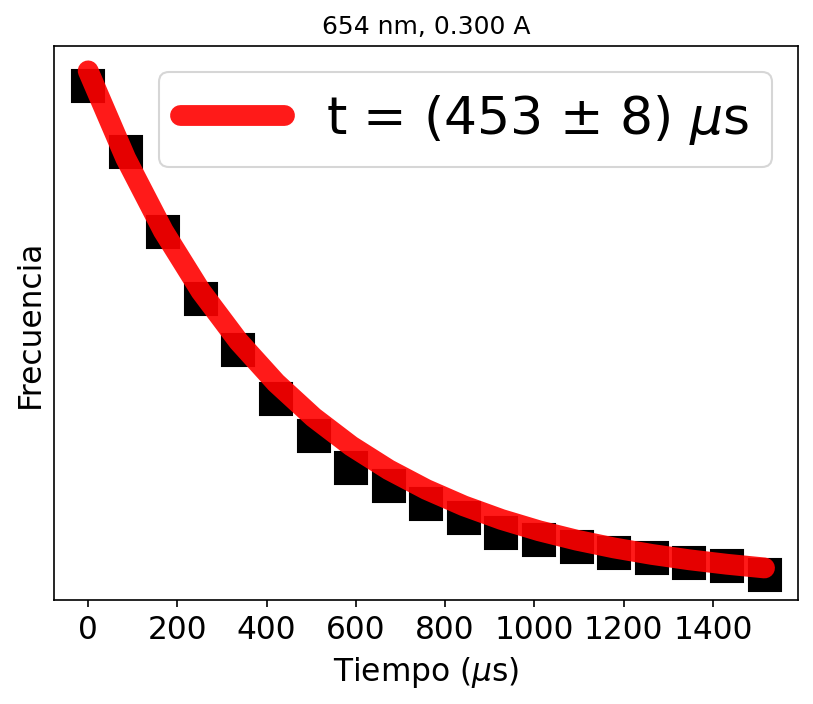

66269


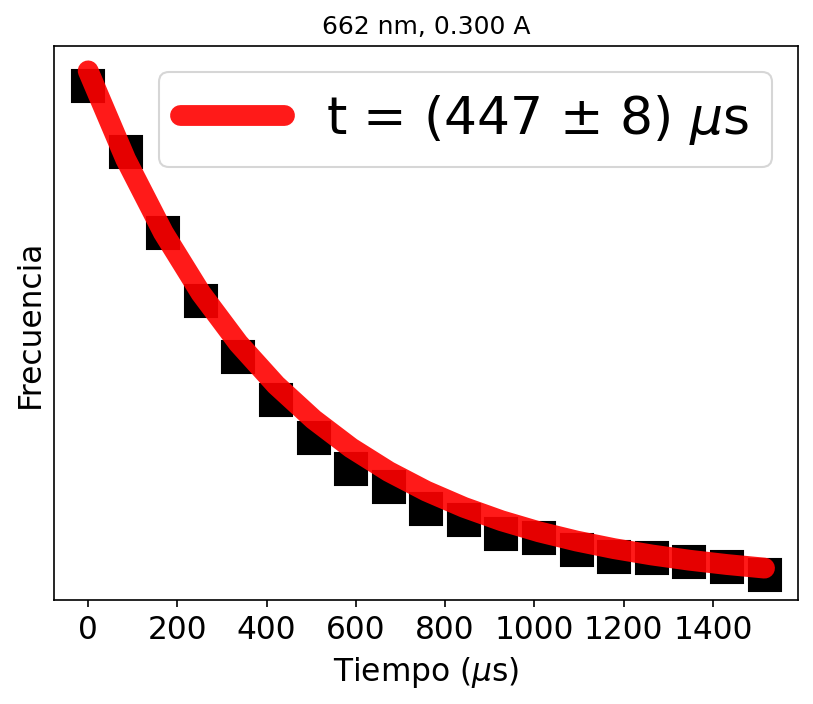

In [5]:
%matplotlib inline
from scipy.optimize import curve_fit

def expon(x, tau):
    return np.exp(-x/tau)/tau

def calc_hist(df, bins = np.linspace(0, 1.6e3, 20)):
    freq, bin_edges = np.histogram(df.arrival_times, bins=bins, density=True)
    bin_width = bin_edges[1]-bin_edges[0]
    bin_centres = bin_edges[1:] - bin_width
    return freq, bin_centres

p = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes')
for d in sorted(p.glob('*.pickle')):
    df = pd.read_pickle(d)
    print(len(df.arrival_times))
    bins = np.linspace(0, 1.5e-3, 80)
    df.arrival_times = df.arrival_times * 1e6
    freq, centres = calc_hist(df)
    popt, pcov = curve_fit(expon, centres, freq, p0=[100])#0.0001])
    tau = popt[0]
    err = np.sqrt(np.diag(pcov)[0])
    #df.hist(bins=bins, density=True)
    plt.figure(dpi=150)
    plt.plot(centres, freq, 's', markersize=15, color="black")
    plt.plot(centres, expon(centres, tau), label=f"t = ({tau:.0f} $\pm$ {err:.0f}) $\mu$s ", linewidth=10, alpha=0.9, solid_capstyle="round", color="#FF0100")
    plt.legend(fontsize=25)
    plt.title(f"{d.name[:d.name.index('_')]} nm, {d.name[d.name.index('_')+1:d.name[::-1].index('_')-1]} A")
    plt.yticks([])
    plt.xticks(fontsize=15)
    plt.xlabel("Tiempo ($\mu$s)", fontsize=15)
    plt.ylabel("Frecuencia", fontsize=15)
    plt.show()

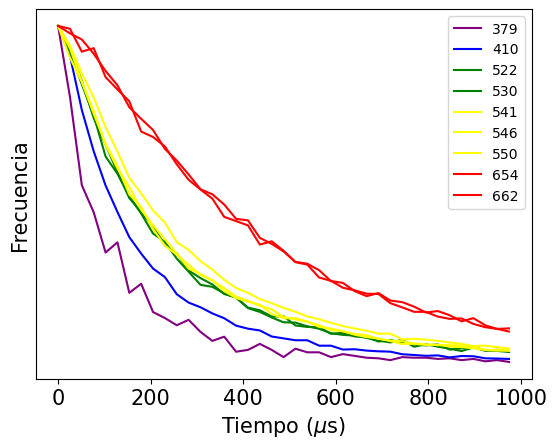

In [10]:

p = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes')
for d in sorted(p.glob('*_0.3000_*.pickle')):
    df = pd.read_pickle(d)
    bins = np.linspace(0, 1e3, 40)
    df.arrival_times = df.arrival_times * 1e6
    freq, centres = calc_hist(df, bins=bins)
    popt, pcov = curve_fit(expon, centres, freq, p0=[100])#0.0001])
    tau = popt[0]
    err = np.sqrt(np.diag(pcov)[0])
    #df.hist(bins=bins, density=True)
    #plt.figure(dpi=150)
    wl = int(d.name[:d.name.index("_")])
    color = colors[wl_color[wl]]
    plt.plot(centres, freq/freq[0], '-', markersize=15, color=color, label=wl)
    #plt.plot(centres, expon(centres, tau), label=f"t = ({tau:.0f} $\pm$ {err:.0f}) $\mu$s ", linewidth=10, alpha=0.9, solid_capstyle="round", color="#FF0100")
    plt.legend()
    #plt.title(f"{d.name[:d.name.index('_')]} nm, {d.name[d.name.index('_')+1:d.name[::-1].index('_')-1]} A")
plt.yticks([])
plt.xticks(fontsize=15)
plt.xlabel("Tiempo ($\mu$s)", fontsize=15)
plt.ylabel("Frecuencia", fontsize=15)
plt.show()

# Espectros pico amarillo

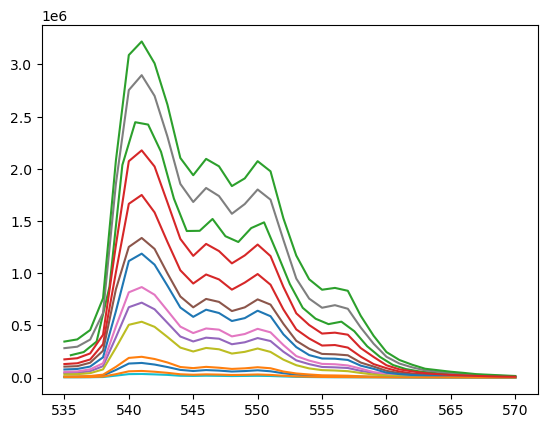

In [312]:
p = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/spectrums_processed')
p_yellow = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/spectrums_yellow')
for d in p.iterdir():
    df = pd.read_pickle(d)
    df_yellow = df[df.wavelength.between(535, 570)]
    #plt.plot(df_yellow.wavelength, df_yellow.counts)
    df_yellow.to_pickle(p_yellow/d.name)

for d in p_yellow.iterdir():
    df = pd.read_pickle(d)
    plt.plot(df.wavelength, df.counts)
plt.show()